<a href="https://colab.research.google.com/github/spring-board-b2-hate-speech/Group-8/blob/s_work/DL%20model/LSTM_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

X_train = train_df['clean_text']
y_train = train_df['IsHatespeech']
X_test = test_df['clean_text']
y_test = test_df['IsHatespeech']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

X_train_tfidf = np.expand_dims(X_train_tfidf, axis=1)
X_test_tfidf = np.expand_dims(X_test_tfidf, axis=1)

Epoch 1/20
59/59 - 57s - loss: 3.1149 - accuracy: 0.5320 - val_loss: 2.4425 - val_accuracy: 0.7358 - lr: 5.0000e-04 - 57s/epoch - 970ms/step
Epoch 2/20
59/59 - 42s - loss: 2.0103 - accuracy: 0.6860 - val_loss: 1.6239 - val_accuracy: 0.7240 - lr: 5.0000e-04 - 42s/epoch - 719ms/step
Epoch 3/20
59/59 - 42s - loss: 1.3439 - accuracy: 0.7875 - val_loss: 1.1136 - val_accuracy: 0.7685 - lr: 5.0000e-04 - 42s/epoch - 717ms/step
Epoch 4/20
59/59 - 41s - loss: 0.9092 - accuracy: 0.8355 - val_loss: 0.8657 - val_accuracy: 0.7567 - lr: 5.0000e-04 - 41s/epoch - 700ms/step
Epoch 5/20
59/59 - 42s - loss: 0.6700 - accuracy: 0.8674 - val_loss: 0.7806 - val_accuracy: 0.7530 - lr: 5.0000e-04 - 42s/epoch - 713ms/step
Epoch 6/20
59/59 - 42s - loss: 0.5505 - accuracy: 0.8775 - val_loss: 0.7067 - val_accuracy: 0.7487 - lr: 5.0000e-04 - 42s/epoch - 706ms/step
Epoch 7/20
59/59 - 42s - loss: 0.4653 - accuracy: 0.8893 - val_loss: 0.6999 - val_accuracy: 0.7503 - lr: 5.0000e-04 - 42s/epoch - 712ms/step
Epoch 8/20
59

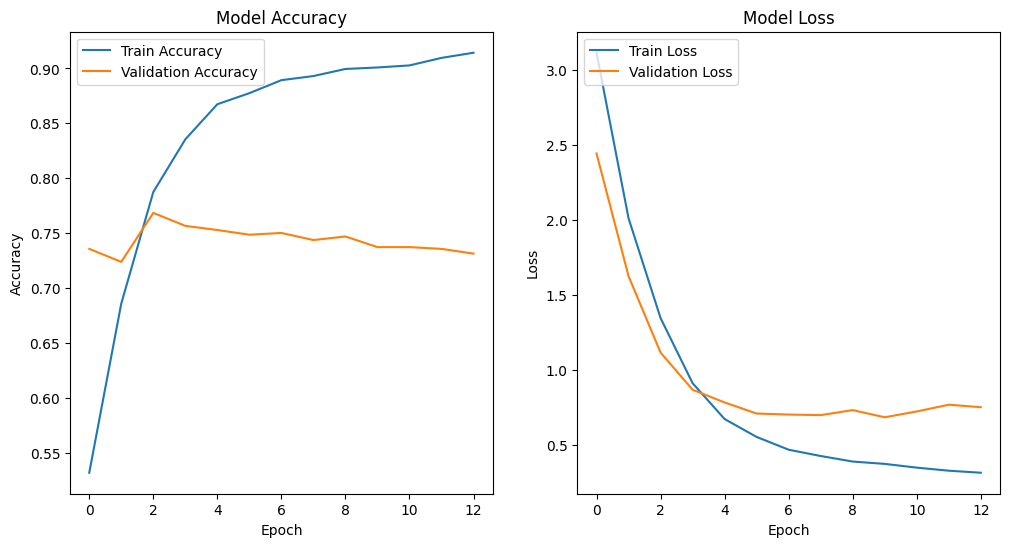

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

model = Sequential()
model.add(Bidirectional(LSTM(512, input_shape=(X_train_tfidf.shape[1], X_train_tfidf.shape[2]), dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

history = model.fit(X_train_tfidf, y_train, epochs=20, batch_size=128,
                    validation_data=(X_test_tfidf, y_test), verbose=2,
                    callbacks=[early_stopping, reduce_lr])

y_pred_prob = model.predict(X_test_tfidf)
y_pred = (y_pred_prob > 0.5).astype("int32")
y_pred = y_pred.flatten()

print("Deep Learning Model Performance with TF-IDF:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()
